<a href="https://colab.research.google.com/github/nimajr/MachineLearning2023/blob/main/HW1/Q1/HW1_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#HW1-Q1.5


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/BankChurners.csv')
data

In [3]:
# بررسی کلاس‌های موجود در ویژگی Attrition_Flag
attrition_classes = data['Attrition_Flag'].value_counts()
print(attrition_classes)


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


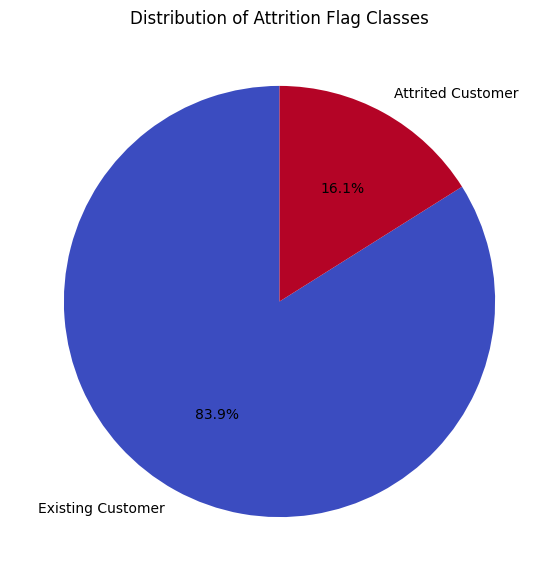

In [4]:


# رسم pie plot برای نمایش توزیع کلاس‌ها
plt.figure(figsize=(7, 7))
data['Attrition_Flag'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Distribution of Attrition Flag Classes")
plt.ylabel("")  # حذف برچسب محورها
plt.show()


In [5]:
# بررسی تعداد هر کلاس در ویژگی Attrition_Flag
attrition_classes = data['Attrition_Flag'].value_counts()
print(attrition_classes)

# محاسبه نسبت‌های هر کلاس
attrition_ratio = data['Attrition_Flag'].value_counts(normalize=True)
print(attrition_ratio)


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


In [8]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# جدا کردن ویژگی‌ها (X) و هدف (y)
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# استفاده از Undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# آموزش مدل با داده‌های متعادل‌شده
model_under = LogisticRegression(max_iter=1000)
model_under.fit(X_train_under, y_train_under)

# پیش‌بینی و ارزیابی مدل
y_pred_under = model_under.predict(X_test)
report_under = classification_report(y_test, y_pred_under)

# نمایش گزارش عملکرد مدل
print(report_under)


ValueError: could not convert string to float: 'F'

In [9]:
# وارد کردن کتابخانه‌های لازم
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder


# فرض بر این است که داده‌ها در متغیر 'data' ذخیره شده‌اند
# در صورت لزوم داده‌ها را بارگذاری کنید (مثال):
# data = pd.read_csv('your_file.csv')

# جدا کردن ویژگی‌ها (X) و هدف (y)
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# شناسایی و کدگذاری ویژگی‌های متنی (در صورت وجود)
categorical_cols = X.select_dtypes(include=['object']).columns

# ایجاد شیء LabelEncoder
label_encoder = LabelEncoder()

# کدگذاری ویژگی‌های متنی
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# استفاده از Undersampling برای متعادل‌سازی داده‌ها
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# آموزش مدل Logistic Regression با داده‌های متعادل‌شده
model_under = LogisticRegression(max_iter=1000)
model_under.fit(X_train_under, y_train_under)

# پیش‌بینی و ارزیابی مدل
y_pred_under = model_under.predict(X_test)
report_under = classification_report(y_test, y_pred_under)

# نمایش گزارش عملکرد مدل
print(report_under)


                   precision    recall  f1-score   support

Attrited Customer       0.28      0.62      0.38       496
Existing Customer       0.90      0.69      0.78      2543

         accuracy                           0.68      3039
        macro avg       0.59      0.65      0.58      3039
     weighted avg       0.80      0.68      0.72      3039

